In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import librosa
import librosa.display
import IPython.display as ipd
sns.set()

In [2]:
import os
file_doc = "C:\\Users\\Dell\\Downloads\\audio_mnist\\data"
labels=os.listdir(file_doc)

In [3]:
file="C:\\Users\\Dell\\Downloads\\audio_mnist\\data\\60\\9_60_5.wav"
data,sample_rate=librosa.load(file)
sample_rate

22050

In [4]:
from scipy.io import wavfile 
import warnings
warnings.filterwarnings("ignore")

In [5]:
from tqdm import tqdm
file_doc = "C:\\Users\\Dell\\Downloads\\audio_mnist\\data"
n_mfcc = 13
n_fft= 2048
hop_length = 512
dataset = []
mfcc_list,mfcc_mean,mfcc_std,mfcc_var=[],[],[],[]
for person in tqdm(range(60)):
        person += 1 
        for record in range(50): 
            for digit in range(10): 
                if person < 10:
                    file = f'{file_doc}/0{person}/{digit}_0{person}_{record}.wav'
                else:
                    file = f'{file_doc}/{person}/{digit}_{person}_{record}.wav'        
                signal,sample_rate = librosa.load(file,sr=sample_rate)
                mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
                mean = mfcc.mean(axis=1).tolist()
                var = mfcc.var(axis=1).tolist()
                features = mean + var +[digit]
                dataset.append(features)

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [13:33<00:00, 13.55s/it]


In [30]:
df['digit'].value_counts()

0    3000
1    3000
2    3000
3    3000
4    3000
5    3000
6    3000
7    3000
8    3000
9    3000
Name: digit, dtype: int64

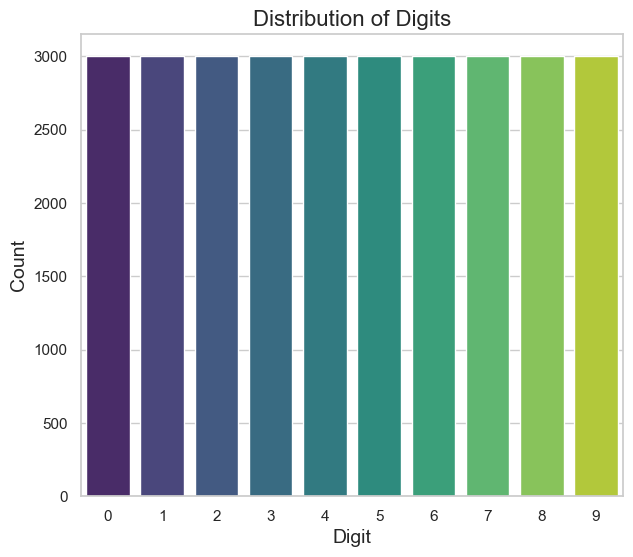

In [31]:
sns.set(style="whitegrid")  
plt.figure(figsize=(7, 6)) 
sns.countplot(x='digit', data=df, palette='viridis')  
plt.xlabel('Digit', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
plt.title('Distribution of Digits', fontsize=16)
plt.show()


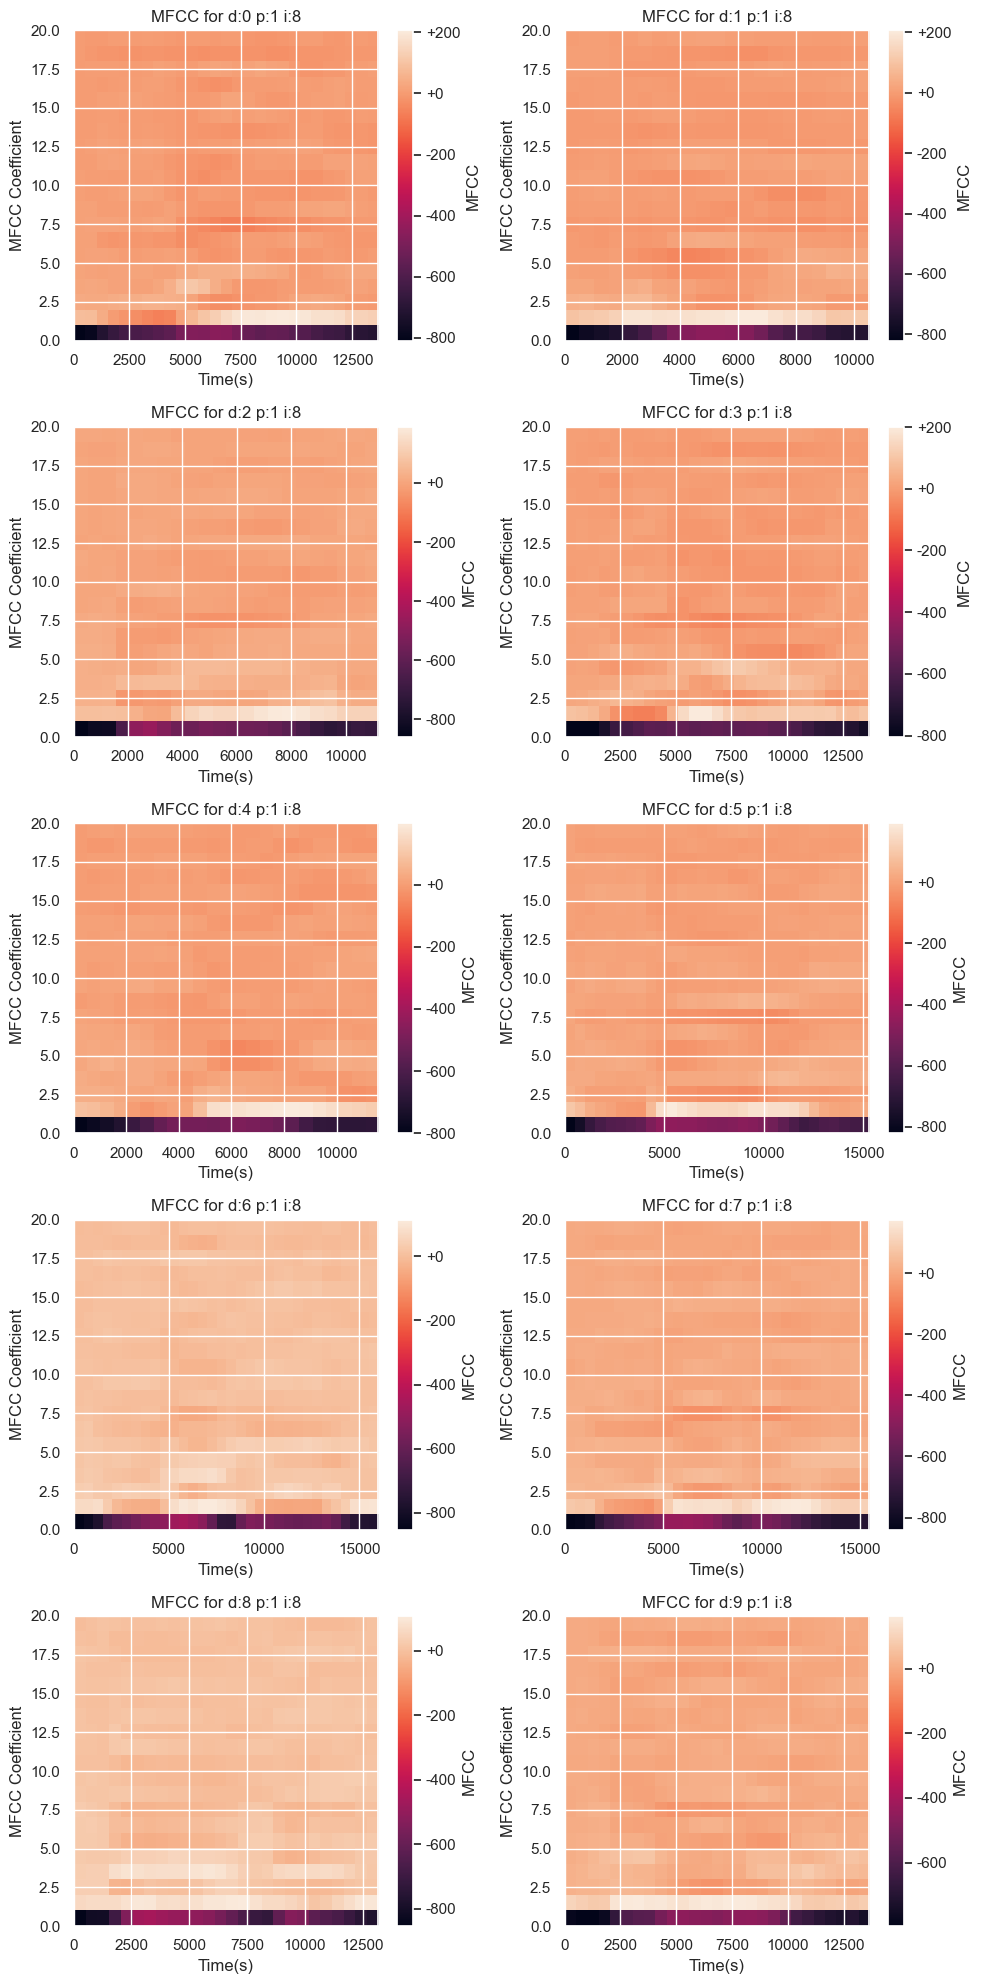

In [40]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

for i, ax in enumerate(axs.flat):
    file_path = os.path.join(file_doc, f'0{person}', f'{i}_0{person}_{record}.wav')
    data = librosa.load(file_path)[0]
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate)

    im = ax.imshow(mfccs, aspect='auto', origin='lower', extent=[0, data.shape[0], 0, len(mfccs)])
    ax.set_title(f"MFCC for d:{i} p:{person} i:{record}")
    ax.set_xlabel("Time(s)")
    ax.set_ylabel("MFCC Coefficient")

    cbar = plt.colorbar(im, ax=ax, format='%+2.0f')
    cbar.set_label('MFCC')

plt.tight_layout()
plt.show()

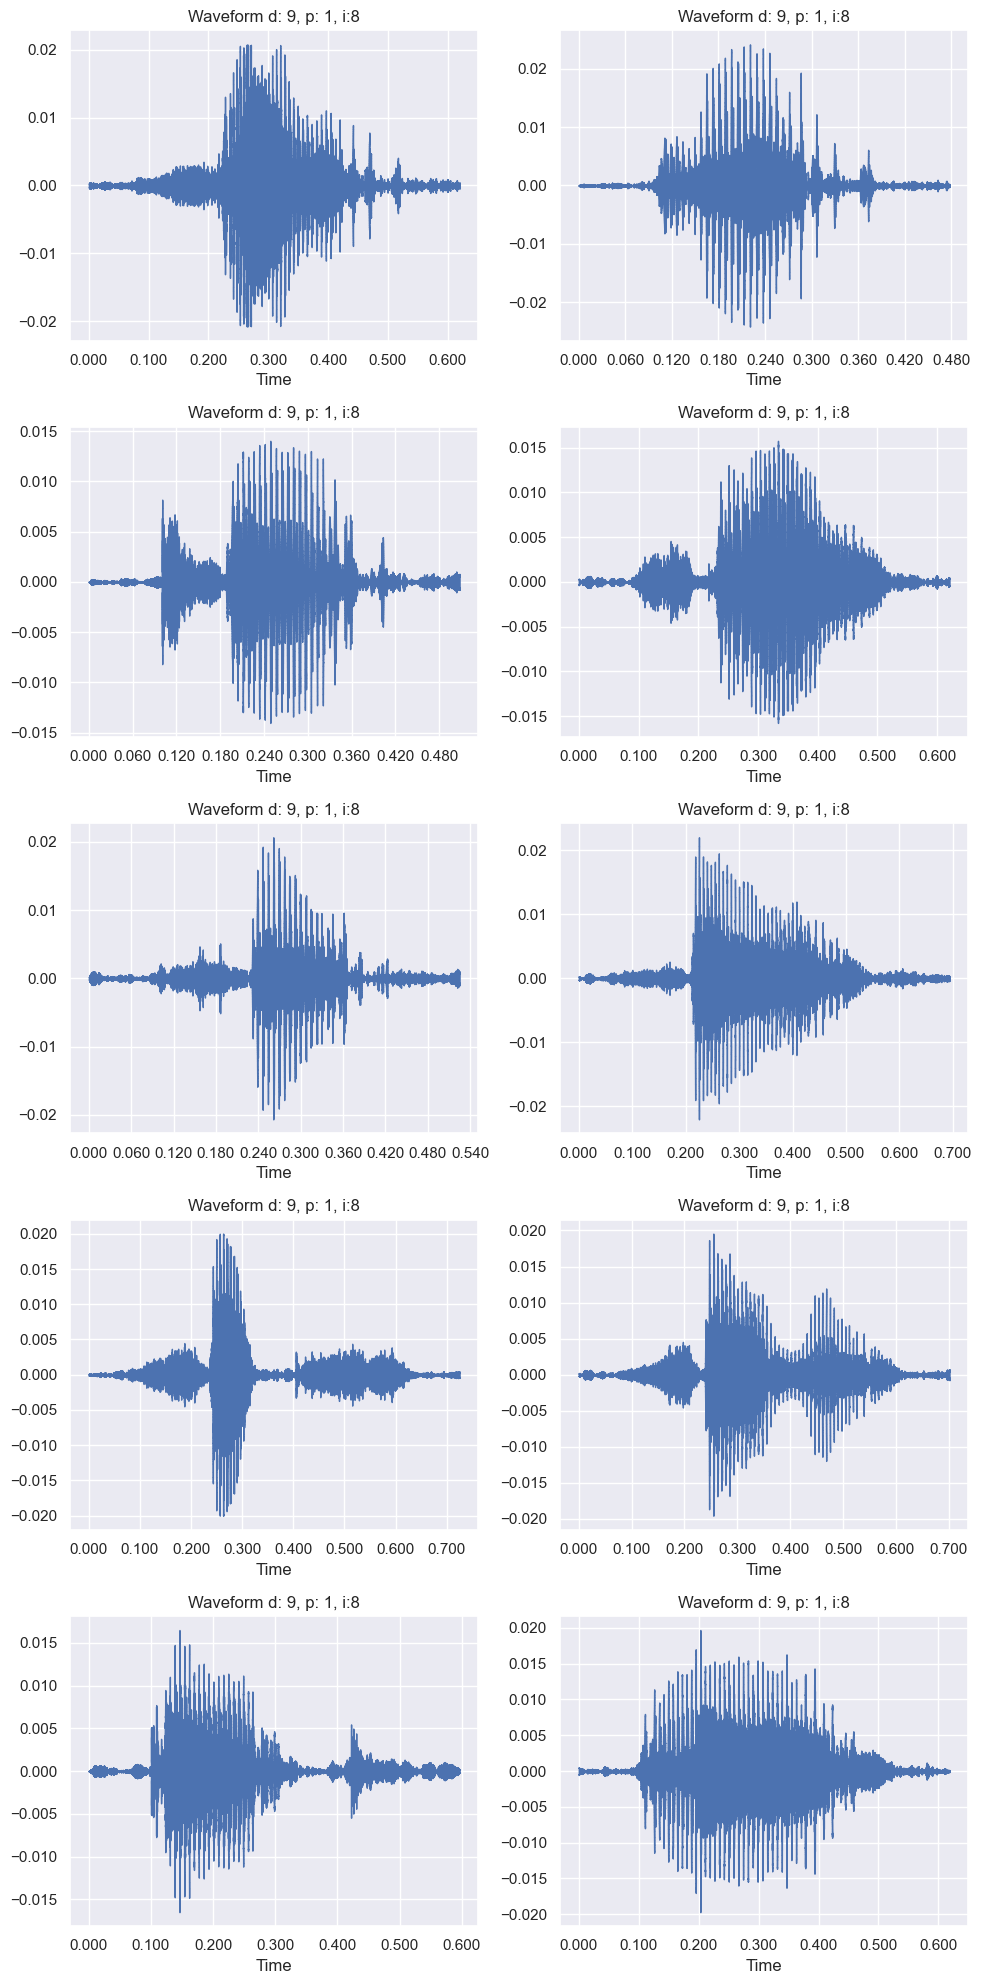

In [45]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

for i, ax in enumerate(axs.flat):
    file_path = os.path.join(file_doc, f'0{person}', f'{i}_0{person}_{record}.wav')
    data, sr = librosa.load(file_path)
    librosa.display.waveshow(data, sr=sr, ax=ax)
    ax.set_title(f"Waveform d: {digit}, p: {person}, i:{record}")

plt.tight_layout()
plt.show()

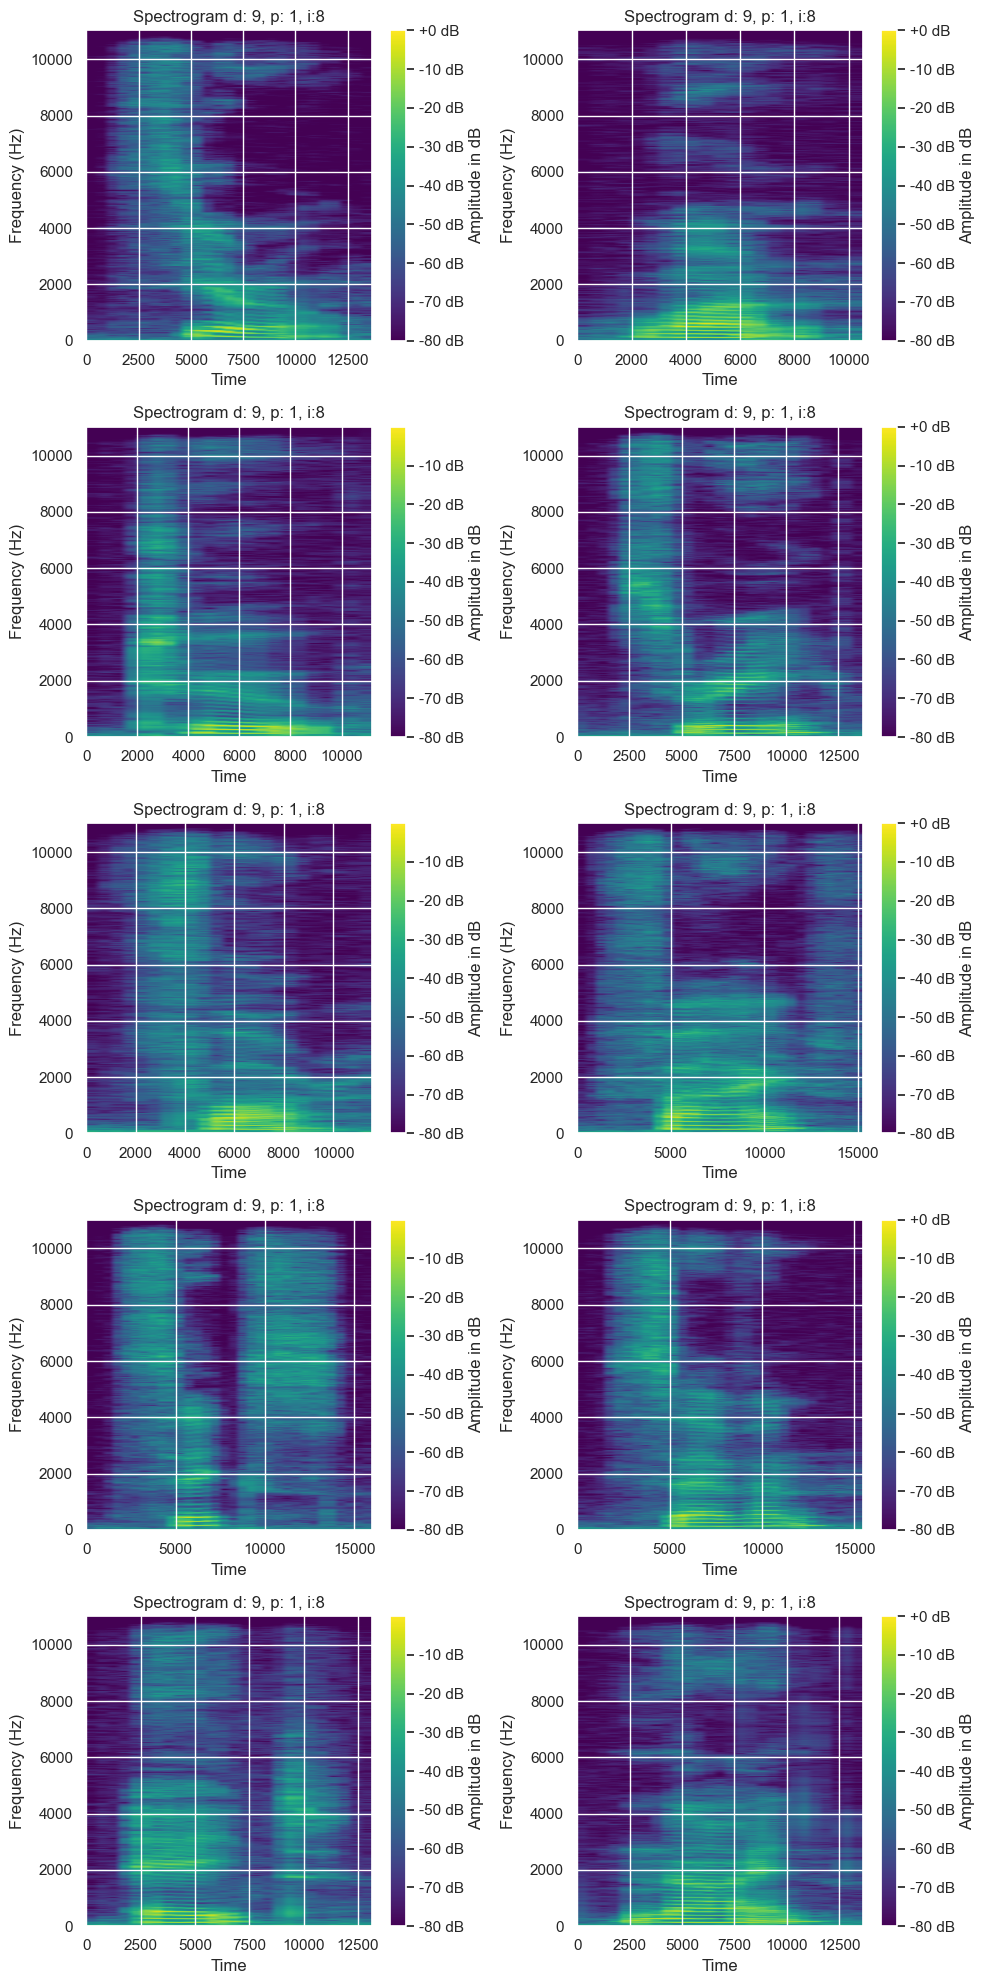

In [47]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

for i, ax in enumerate(axs.flat):
    file_path = os.path.join(file_doc, f'0{person}', f'{i}_0{person}_{record}.wav')
    data, sample_rate = librosa.load(file_path)
    D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)
    im = ax.imshow(D, aspect='auto', origin='lower', cmap='viridis', extent=[0, data.shape[0], 0, sample_rate/2])

    ax.set_title(f"Spectrogram d: {digit}, p: {person}, i:{record}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Frequency (Hz)")

    cbar = plt.colorbar(im, ax=ax, format='%+2.0f dB')
    cbar.set_label('Amplitude in dB')

plt.tight_layout()
plt.show()

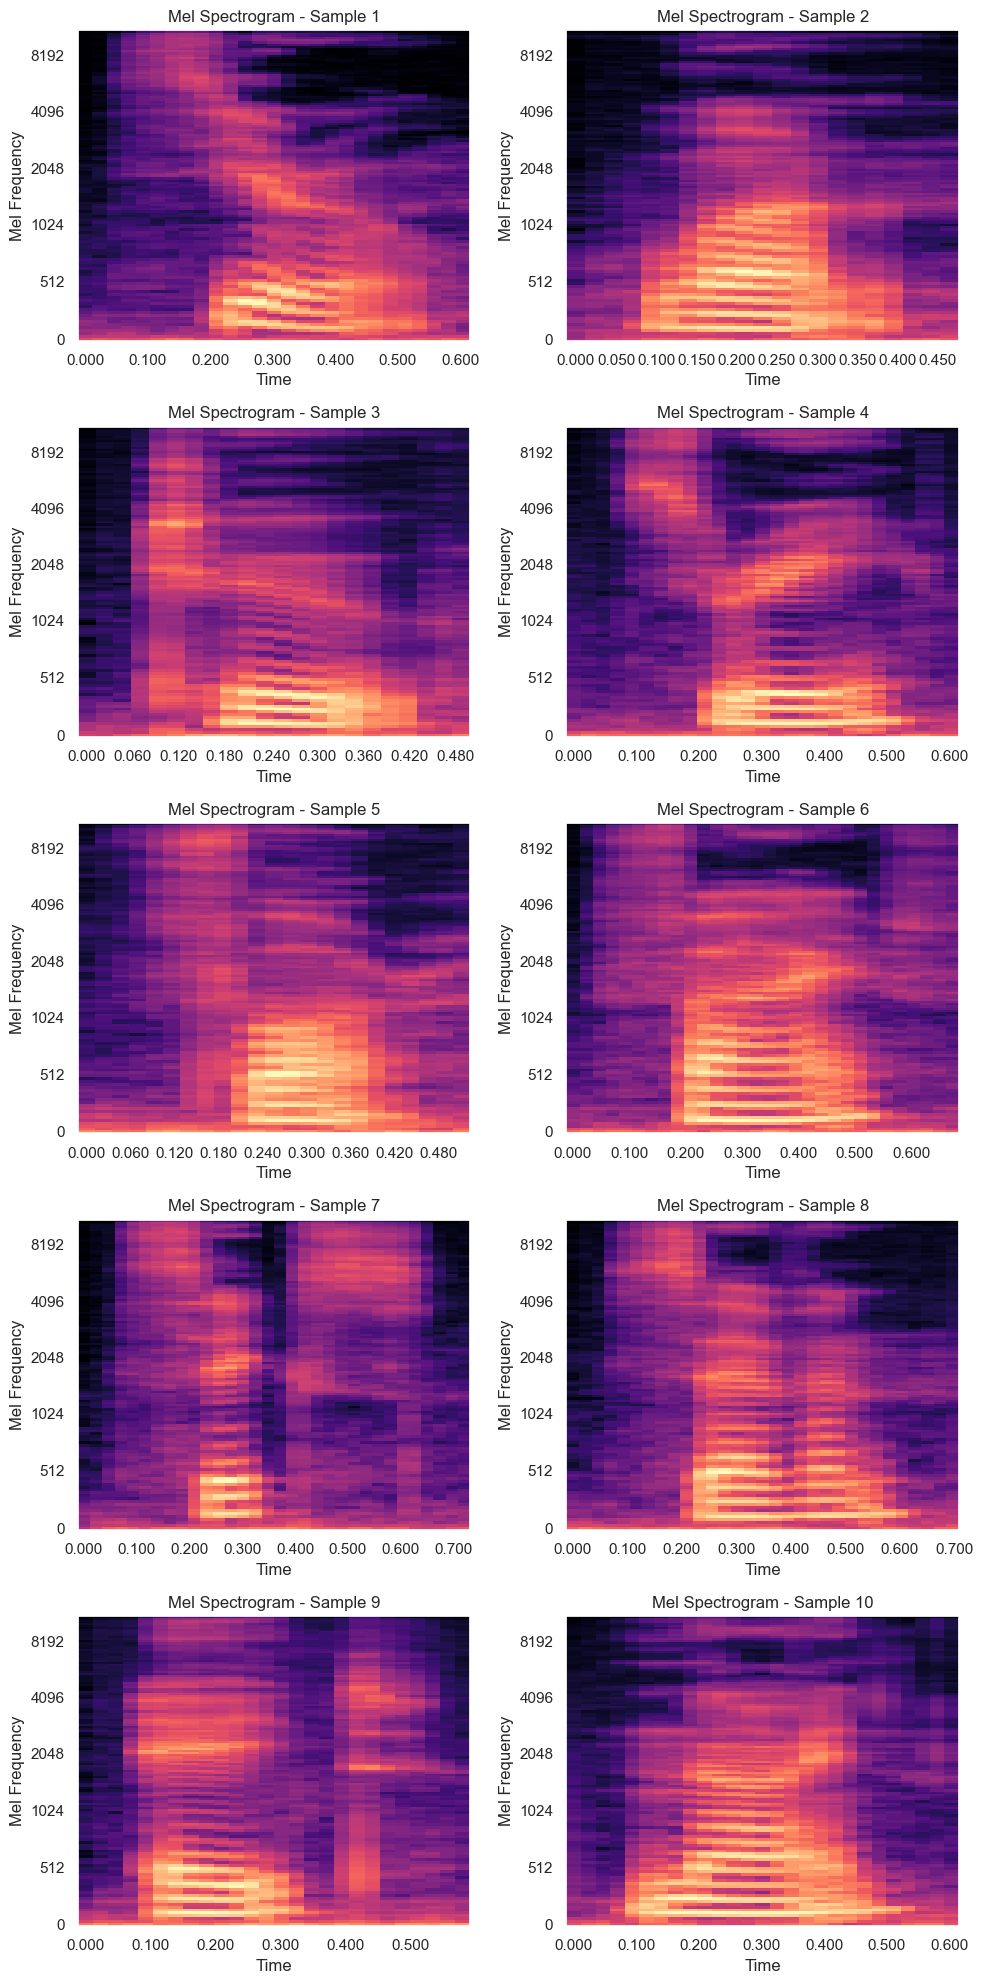

In [58]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

for i, ax in enumerate(axs.flat):
    file_path = os.path.join(file_doc, f'0{person}', f'{i}_0{person}_{record}.wav')
    data, sample_rate = librosa.load(file_path)
    
    # Compute the Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sample_rate)

    # Convert to decibels
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Display the Mel spectrogram
    im = librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel', ax=ax)

    ax.set_title(f"Mel Spectrogram - Sample {i + 1}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Mel Frequency")

plt.tight_layout()
plt.show()


In [7]:
cols = ['Mean' + str(x+1) for x in range(n_mfcc)] + ['Variance' + str(x+1) for x in range(n_mfcc)] +['digit']
df = pd.DataFrame(dataset, columns=cols)

In [8]:
df.head()

Mean1       Mean2      Mean3      Mean4      Mean5     Mean6  \
0 -617.908264  101.589767   9.847579  26.403582  25.784245  1.755381   
1 -664.994507  149.610611  26.261110  23.693596  19.233934 -3.658059   
2 -627.440063  117.020599  24.828531  25.543558  19.895420  1.942103   
3 -638.245483   71.061699  18.628624  47.587078  38.369740  3.692852   
4 -617.039429  111.224503  19.910679  10.943748   3.801411 -0.992975   

      Mean7      Mean8     Mean9    Mean10  ...   Variance5   Variance6  \
0  7.380786 -12.520157  8.840893 -0.251336  ...  524.241394  117.931831   
1  6.188647 -10.573398  9.452545 -5.766154  ...  650.744202  875.923340   
2 -3.384886   0.424581  5.882215 -8.079787  ...  141.031342   78.117447   
3  4.340427 -14.081750  6.751012  3.282110  ...  691.583984  678.009094   
4  5.456503   2.375250  0.115829  4.444157  ...  407.882141  604.594788   

    Variance7   Variance8   Variance9  Variance10  Variance11  Variance12  \
0  122.885208  637.004333   92.920189   62.865086   96.420929  109.956749   
1  125.463722  192.702515   48.036625   70.113075  102.460358   73.125206   
2  306.251160  385.132477   90.266251  188.860931  143.997772   54.707287   
3  102.747574  318.735565  192.386566   92.577560  190.523300   41.448853   
4  120.317986   82.729393   93.410355  110.351662   26.764700   57.042217   

   Variance13  digit  
0   41.682251      0  
1   35.113739      1  
2   90.763809      2  
3   31.486105      3  
4   38.519707      4  

[5 rows x 27 columns]

In [9]:
inputs=df.drop('digit', axis=1)
target=np.array(df['digit'])

In [10]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le=LabelEncoder()
y=le.fit_transform(target)
classes=list(le.classes_)
y1=to_categorical(y)

In [11]:
y1.shape

(30000, 10)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,y1,test_size=0.3,random_state=26,shuffle=True)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train =scaler.fit_transform(x_train)
x_test =scaler.transform(x_test)

In [14]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [15]:
y_test[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
x_train.shape

(21000, 26)

In [17]:
x_train.head()

0         1         2         3         4         5         6   \
0 -1.284514 -0.380037  1.742628  0.263284 -0.442421  0.881403  0.254666   
1 -1.436796  0.052810  0.693810  0.707726  0.638243  1.261404  0.910546   
2  0.121454  0.491827 -0.950623  0.513356 -0.354898  0.450690  2.128212   
3  1.068255 -0.122570  0.183941 -0.465946  0.141838  1.440534 -0.229002   
4 -1.873576 -0.002902 -0.140524 -0.604089  0.083433  1.082859  0.713938   

         7         8         9   ...        16        17        18        19  \
0  0.733846 -0.500158 -0.761755  ...  1.541985 -1.340089 -0.629317 -0.360254   
1  1.216169 -0.068334  0.494867  ... -0.865907 -0.377610 -1.116289 -0.319472   
2 -0.925438  0.297211  0.921004  ...  0.619607  0.454147 -0.141496 -0.463417   
3  0.078596 -1.206814  0.354288  ... -0.715357  0.318040  0.775754  1.074890   
4  0.077390 -0.107110  0.050254  ... -0.782924 -1.323840 -0.664034 -0.991215   

         20        21        22        23        24        25  
0 -0.292409  0.003935  0.169170 -1.003006 -0.950376 -0.464710  
1 -0.226362  0.393764 -0.956016  0.125976  1.121189 -0.475380  
2  0.946163 -0.689507 -0.749489  0.531722 -0.865168 -0.865587  
3  0.049316  2.082561  3.086609 -0.874959 -0.668665 -0.418214  
4 -0.581720 -0.762323 -0.334349  0.051621  1.986477  0.662185  

[5 rows x 26 columns]

In [18]:
x_test.shape

(9000, 26)

In [19]:
y_train.shape

(21000, 10)

In [20]:
y_test.shape

(9000, 10)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import layers, models

In [22]:
model = Sequential()
model.add(Dense(100, input_shape=(26,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2700      
                                                                 
 dense_1 (Dense)             (None, 128)               12928     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 49942 (195.09 KB)
Trainable params: 49942 (195.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
learn_rate=tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5)
history=model.fit(x_train, y_train ,epochs=100, callbacks=[es,learn_rate],batch_size=32,validation_data=(x_test,y_test))

Epoch 1/100
657/657 [==============================] - 8s 7ms/step - loss: 0.2389 - accuracy: 0.9264 - val_loss: 0.1059 - val_accuracy: 0.9647 - lr: 0.0010
Epoch 2/100
657/657 [==============================] - 4s 6ms/step - loss: 0.0860 - accuracy: 0.9714 - val_loss: 0.0864 - val_accuracy: 0.9699 - lr: 0.0010
Epoch 3/100
657/657 [==============================] - 4s 6ms/step - loss: 0.0678 - accuracy: 0.9779 - val_loss: 0.0777 - val_accuracy: 0.9739 - lr: 0.0010
Epoch 4/100
657/657 [==============================] - 4s 6ms/step - loss: 0.0557 - accuracy: 0.9805 - val_loss: 0.0772 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 5/100
657/657 [==============================] - 4s 7ms/step - loss: 0.0422 - accuracy: 0.9863 - val_loss: 0.0738 - val_accuracy: 0.9777 - lr: 0.0010
Epoch 6/100
657/657 [==============================] - 4s 6ms/step - loss: 0.0406 - accuracy: 0.9864 - val_loss: 0.0643 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 7/100
657/657 [==============================] - 4s 6ms/st

In [25]:
losss,accc=model.evaluate(x_test,y_test)
print('Loss is :',losss)
print('ACC is :',accc)

282/282 [==============================] - 1s 4ms/step - loss: 0.0421 - accuracy: 0.9916
Loss is : 0.04213786497712135
ACC is : 0.9915555715560913


In [26]:
import lime
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
feature_names = inputs.columns.values.tolist()
class_names = list(set(target))
explainer = LimeTabularExplainer(x_train.values, feature_names=feature_names, class_names=class_names,mode='classification')
print(class_names)
print(len(feature_names))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
26


In [27]:
j = 0
exp = explainer.explain_instance(x_test.values[j], model.predict, num_features=6)

157/157 [==============================] - 1s 3ms/step


In [28]:
exp.show_in_notebook(show_table=True)

In [29]:
exp.as_list()

[('Mean5 <= -0.67', 0.08804954305052638),
 ('-0.51 < Mean2 <= 0.11', -0.0773455075904776),
 ('Mean8 > 0.70', 0.04676552922786634),
 ('Mean12 > 0.69', 0.038731811864257566),
 ('-0.76 < Variance4 <= -0.28', 0.03689628435673601),
 ('Variance8 <= -0.72', 0.02299522436926542)]

In [26]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

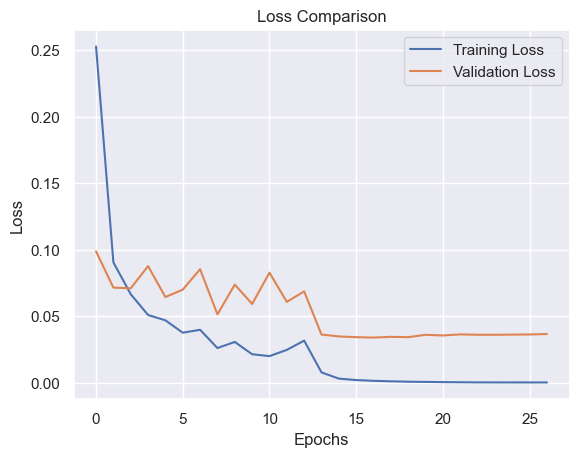

In [27]:
plt.title('Loss Comparison')
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

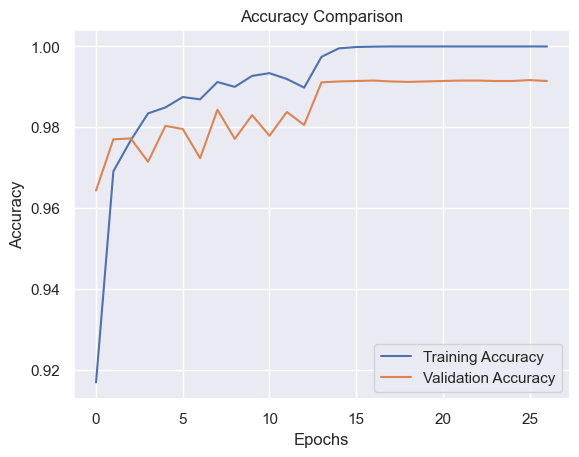

In [28]:
plt.title('Accuracy Comparison')
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
def predict(audio):
    prob = model.predict(audio.reshape(1, 26))
    index = np.argmax(prob[0])
    return classes[index]

In [30]:
from sklearn.metrics import confusion_matrix
actual, pred = [], []

for index in range(len(x_test)):
    samples = x_test.iloc[index].values.reshape(26,) 
    true_label = classes[np.argmax(y_test[index])]
    predicted_label = predict(samples)
    
    actual.append(true_label)
    pred.append(predicted_label)

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 31ms/step


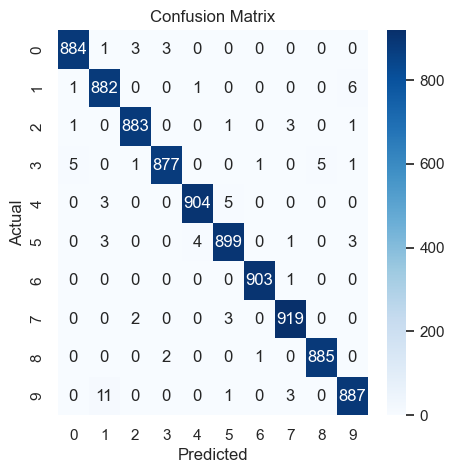

In [31]:
conf_mat = confusion_matrix(actual, pred, labels=classes)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

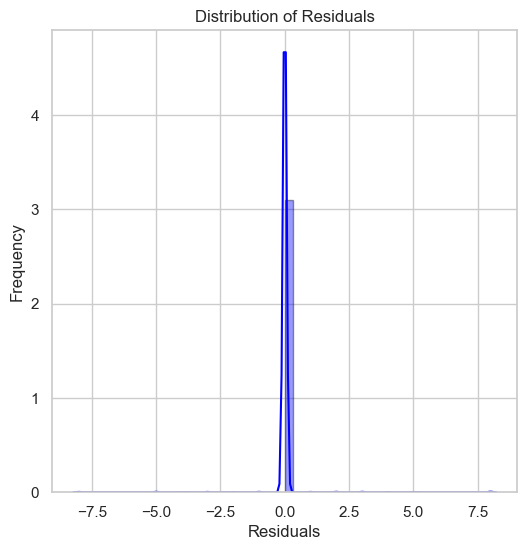

In [78]:
from sklearn.metrics import mean_squared_error
residuals = np.array(actual) - np.array(pred)
#sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.distplot(residuals, hist=True, kde=True, color='blue', hist_kws={'edgecolor': 'black'})
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [33]:
y_train.shape

(21000, 10)

282/282 [==============================] - 1s 2ms/step


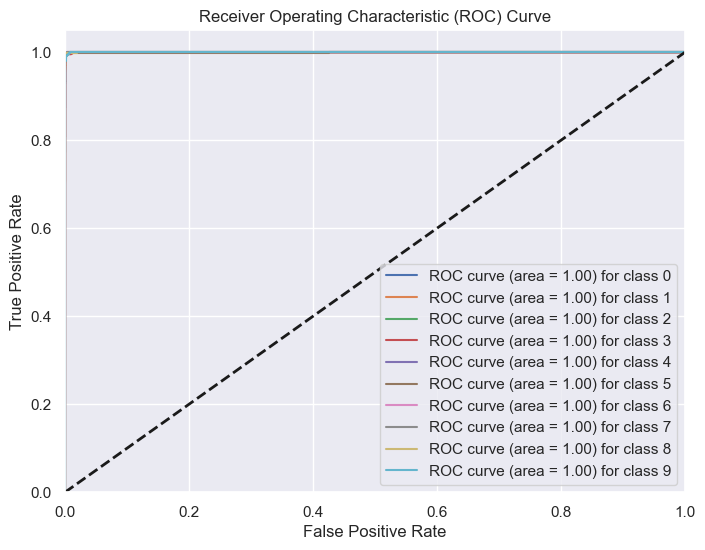

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_score, classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=classes)

    # Compute ROC curve and ROC area for each class
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {classes[i]}')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
y_score = model.predict(x_test)

plot_roc_curve(actual, y_score, classes)


282/282 [==============================] - 1s 3ms/step


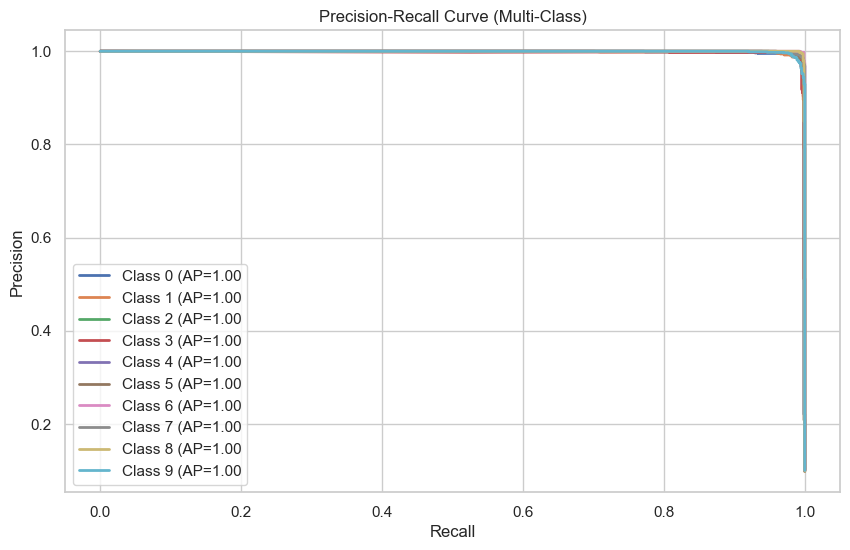

In [77]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

model_predictions = model.predict(x_test)
n_classes=10
y_bin = label_binarize(actual, classes=[0, 1, 2,3,4,5,6,7,8,9])  # Replace n_classes with the number of classes

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_bin[:, i], model_predictions[:, i])
    average_precision = average_precision_score(y_bin[:, i], model_predictions[:, i])
    
    plt.plot(recall, precision, lw=2, label=f'Class {i} (AP={average_precision:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multi-Class)')
plt.legend()
plt.show()

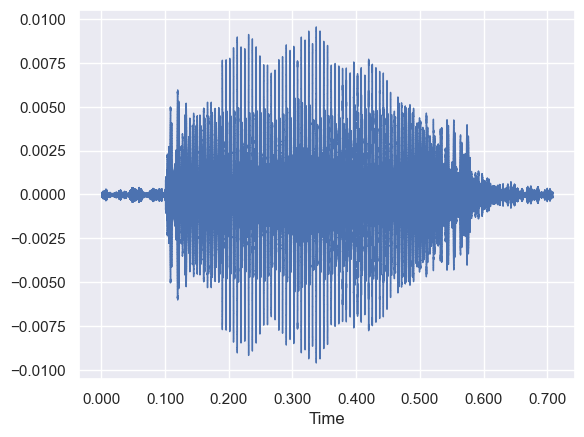

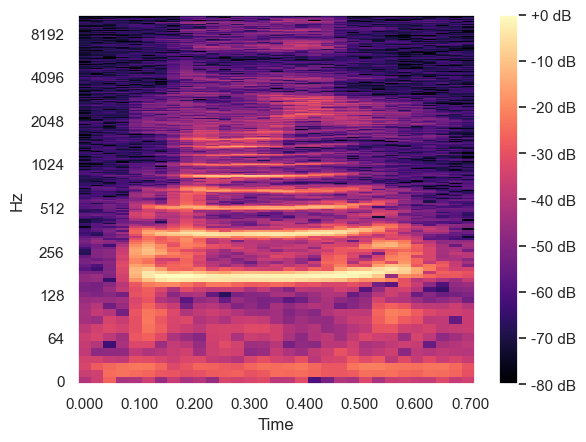

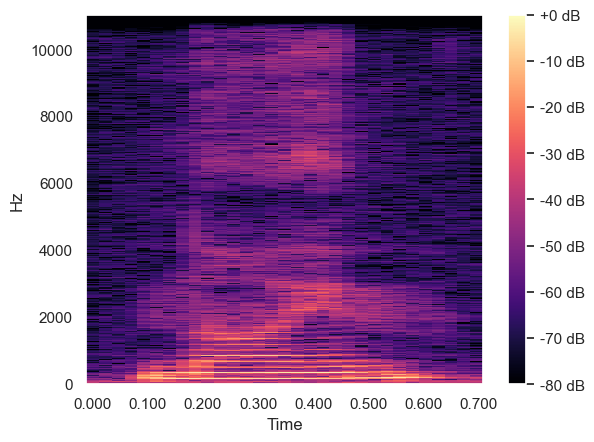

In [35]:
#waveform
y= librosa.load(file)[0]
librosa.display.waveshow(y, sr=sample_rate)
plt.show()

#spectrogram-log
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.show()

#spectrogram-linear
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()